In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv

%matplotlib inline

import lib_ecofun as lef

In [2]:
from importlib import reload
reload(lef)

<module 'lib_ecofun' from '/home/fedef/Research/abstractsepapers/papers/DREAM/codes/lib_ecofun.py'>

In [3]:
from scipy.optimize import curve_fit, minimize

In [29]:
def cost_function(parset, params = lef.default_params.copy(), year_ini = 2015, inicond = lef.inicond_2015, verbose = False):
    #print(parset)
    #params = lef.default_params.copy()
    params['beta_0'] = parset[0]
    params['gamma_g'] = parset[1]
    params['growth'] = parset[2]
    # params['delta_g'] = parset[3]
    # params['delta_f'] = parset[3]
    params['delta_sig'] = parset[3]
    #params['a'] = parset[4]
    #print(params)
    
    resu = lef.run_model(inicond = inicond, params = params, n_iter = 2025 - year_ini, verbose = verbose, rule = 'maxgreen')
    #print(resu)
    cost = lef.costfun_1524(resu, year_ini = year_ini)
    if verbose: print(cost)

    return cost

# Fitting to observations
## Using only 2015-2023 for both energy share and investment share. Starting in 2015

In [30]:
# Initial guess for the parameters
# initial_guess = [-0.2, 0.65, 0.015, 0.01, 0.7]
# bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.0, 0.03), (0.3, 1.3)]

initial_guess = [-0.2, 0.65, 0.015, 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.3, 1.3)]#, (0.5, 1.5)]
params = lef.default_params

# Step 5: Use an optimization function to find the best parameters
result = minimize(cost_function, initial_guess, bounds = bounds, args = (params, 2015, lef.inicond_2015))
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 34.32602238266617
        x: [-1.373e-01  7.319e-01  2.288e-02  3.045e-01]
      nit: 15
      jac: [ 1.782e+02  1.356e+02 -1.379e+03  3.022e+01]
     nfev: 125
     njev: 25
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


2033 2057 2064


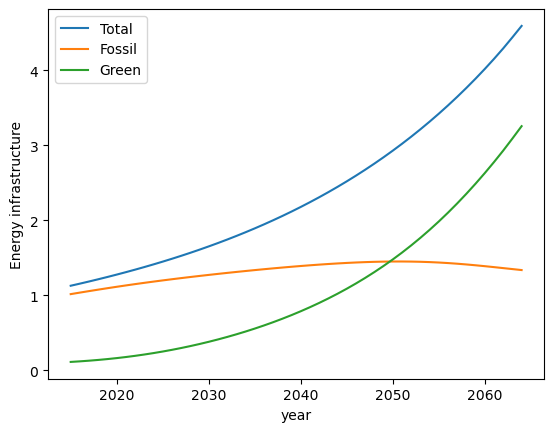

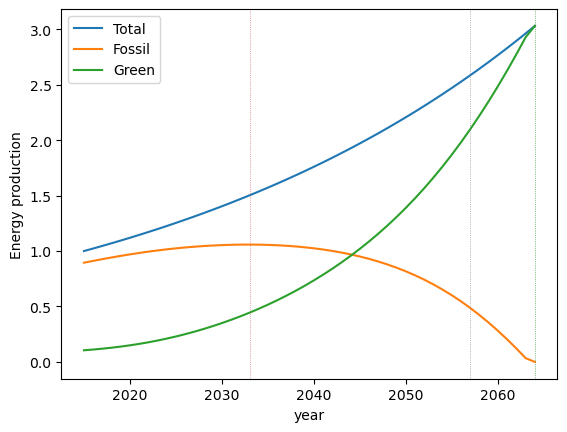

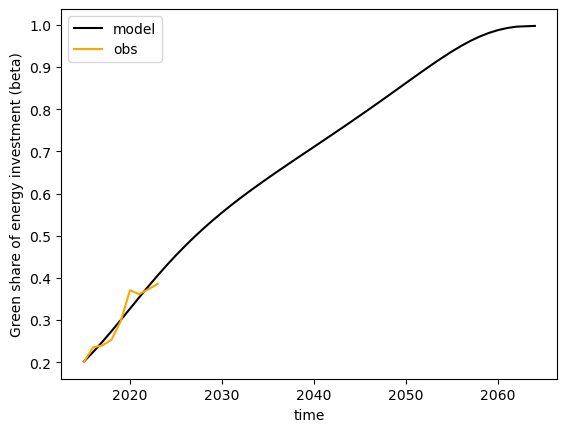

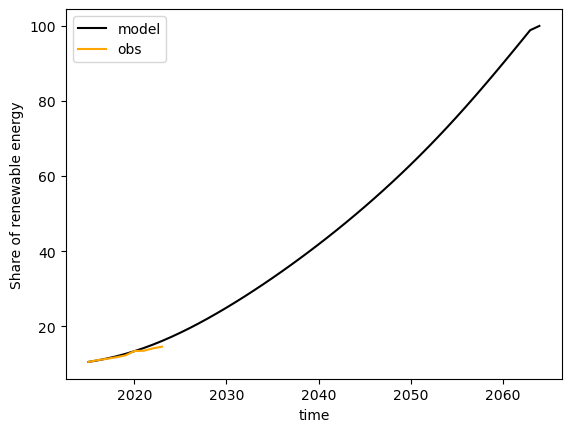

In [31]:
params = lef.default_params
params['beta_0'], params['gamma_g'], params['growth'], params['delta_sig'] = result.x

resu = lef.run_model(inicond = lef.inicond_2015, params = params, n_iter = 100, verbose = False, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2015)
lef.plot_resuvsobs(resu, year_ini = 2015)

print(2015 + resu['year_peak'], 2015 + resu['year_halved'], 2015 + resu['year_zero'])

## Same, but starting in 2000

In [32]:
initial_guess = [-0.2, 0.65, 0.015, 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.3, 1.3)]#, (0.5, 1.5)]
params = lef.default_params

# Step 5: Use an optimization function to find the best parameters
result = minimize(cost_function, initial_guess, bounds = bounds, args = (params, 2000, lef.inicond_2000))
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 36.49471756766749
        x: [-2.315e-01  7.244e-01  1.828e-02  3.000e-01]
      nit: 60
      jac: [ 8.594e-03  5.991e-03 -3.436e-02  2.395e+02]
     nfev: 460
     njev: 92
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


2027 2053 2060


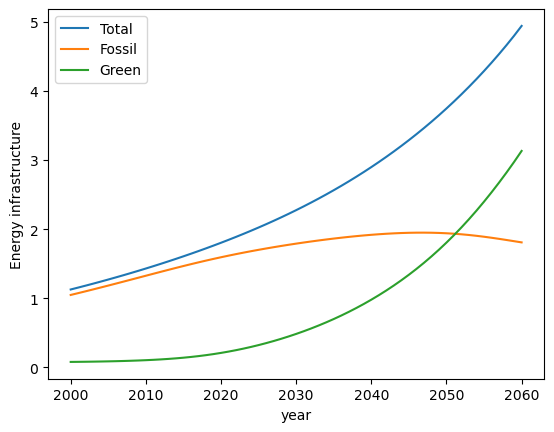

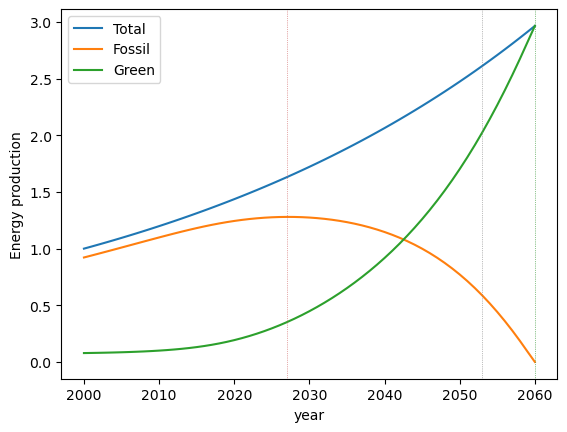

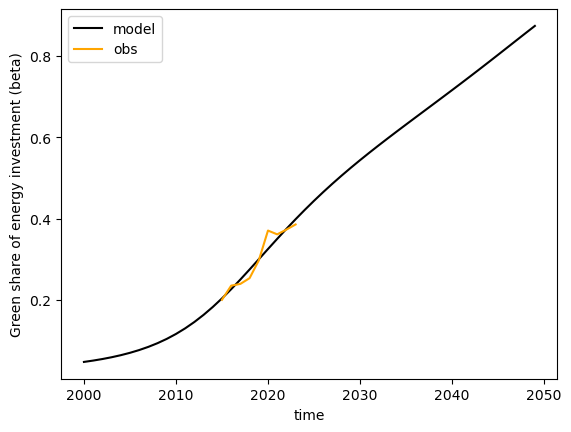

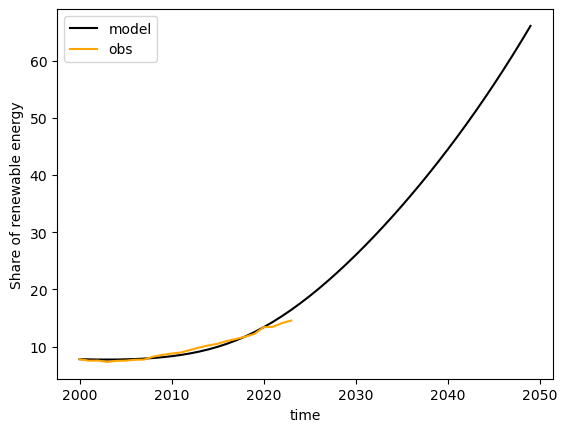

In [33]:
params = lef.default_params
params['beta_0'], params['gamma_g'], params['growth'], params['delta_sig'] = result.x

resu = lef.run_model(inicond = lef.inicond_2000, params = params, n_iter = 100, verbose = False, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2000)
lef.plot_resuvsobs(resu, year_ini = 2000)

yini = 2000
print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

## Improving the fit. Using 2000-2023 for energy share and 2015-2023 for investment share

In [34]:
def cost_function_hist(parset, params = lef.default_params.copy(), year_ini = 2000, inicond = lef.inicond_2000, verbose = False, I_weight = 1.):
    #print(parset)
    #params = lef.default_params.copy()
    params['beta_0'] = parset[0]
    params['gamma_g'] = parset[1]
    params['growth'] = parset[2]
    # params['delta_g'] = parset[3]
    # params['delta_f'] = parset[3]
    params['delta_sig'] = parset[3]
    #params['a'] = parset[4]
    #print(params)
    
    resu = lef.run_model(inicond = inicond, params = params, n_iter = 2024-year_ini, verbose = verbose, rule = 'maxgreen')
    #print(resu)
    cost = lef.costfun_hist(resu, year_ini = year_ini, I_weight = I_weight)
    if verbose: print(cost)

    return cost

In [35]:
initial_guess = [-0.2, 0.65, 0.015, 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.3, 1.3)]#, (0.5, 1.5)]

params = lef.default_params
year_ini = 2000
verbose = False

# Step 5: Use an optimization function to find the best parameters
result = minimize(cost_function_hist, initial_guess, bounds = bounds, args = (params, year_ini, lef.inicond_2000, verbose))

In [36]:
print(result)

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 35.01944490239206
        x: [-1.793e-01  6.461e-01  1.706e-02  3.000e-01]
      nit: 46
      jac: [-1.444e-02 -1.121e-02  8.137e-02  7.646e+01]
     nfev: 510
     njev: 102
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


2026 2054 2063


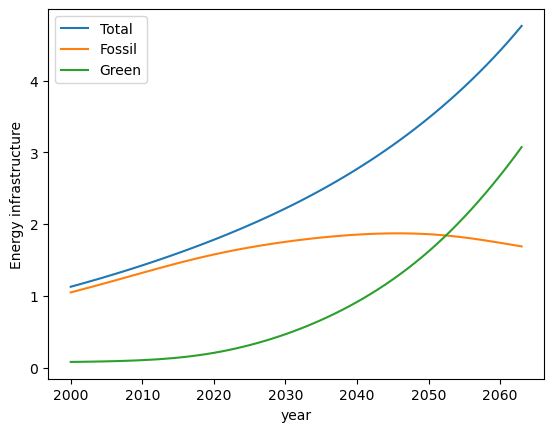

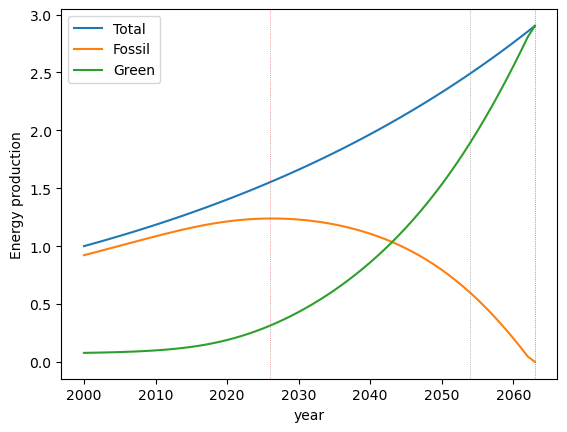

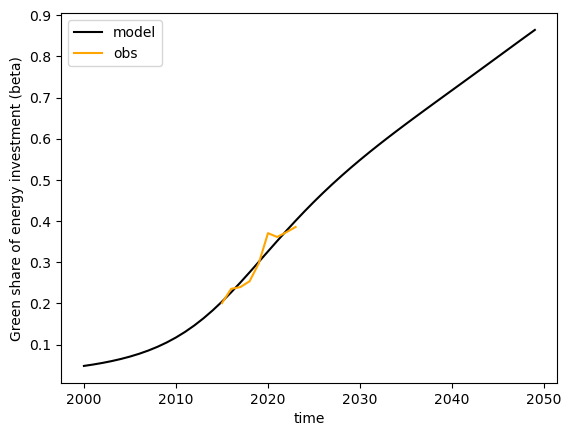

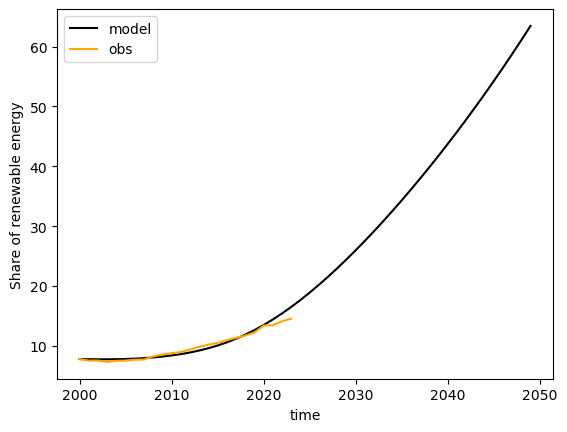

In [37]:
params['beta_0'], params['gamma_g'], params['growth'], params['delta_sig'] = result.x

resu = lef.run_model(inicond = lef.inicond_2000, params = params, n_iter = 100, verbose = False, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2000)
lef.plot_resuvsobs(resu, year_ini = 2000)#, ind_ini = 0, ind_fin = 24)

yini = 2000
print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

In [38]:
params

{'growth': 0.017055428532726295,
 'eps': 1,
 'a': 1,
 'b': 1,
 'gamma_f': 0.5,
 'gamma_g': 0.6460875554154768,
 'eta_g': 0.2,
 'eta_f': 0.2,
 'h_g': 0.5,
 'h_f': 0.5,
 'r_inv': 0.1,
 'beta_0': -0.1792655638830066,
 'delta_sig': 0.3,
 'delta_g': 0.01,
 'delta_f': 0.01,
 'f_heavy': 0.1}

## Same, but weighting more the energy share

With I_weight = 0.1, the transition is slowed. Green energy share is quite sensitive to this..

In [39]:
initial_guess = [-0.2, 0.7, 0.02, 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.3, 1.5)]#, (0.5, 1.5)]

params = lef.default_params
year_ini = 2000
verbose = False

I_weight = 0.1

# Step 5: Use an optimization function to find the best parameters
result = minimize(cost_function_hist, initial_guess, bounds = bounds, args = (params, year_ini, lef.inicond_2000, verbose, I_weight))
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 7.499028834025767
        x: [-1.149e-01  5.751e-01  1.878e-02  3.000e-01]
      nit: 44
      jac: [ 3.553e-06  1.954e-06 -1.261e-05  4.713e+01]
     nfev: 360
     njev: 72
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


2030 2061 2070


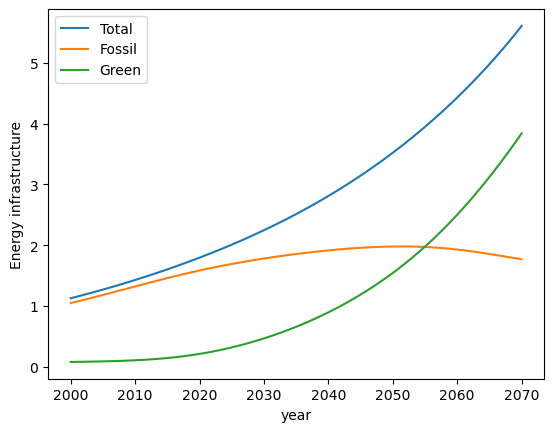

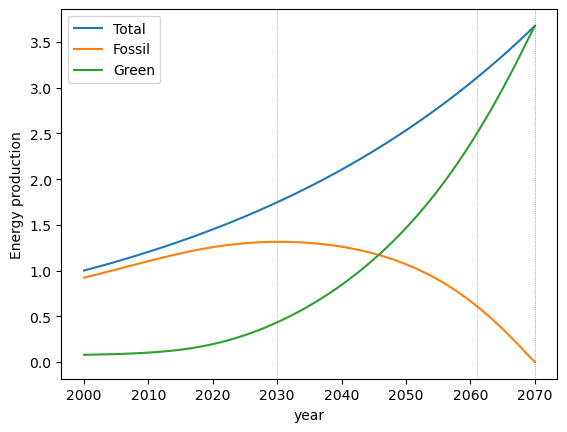

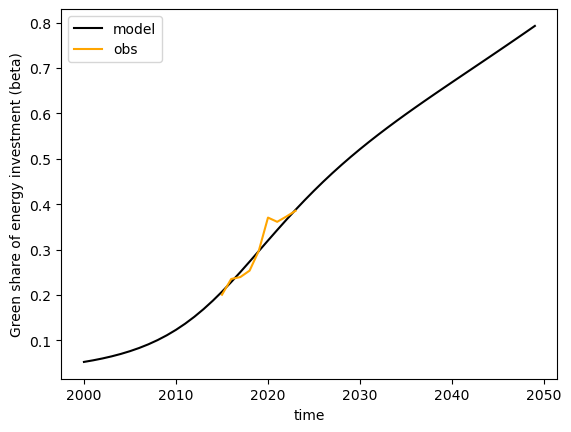

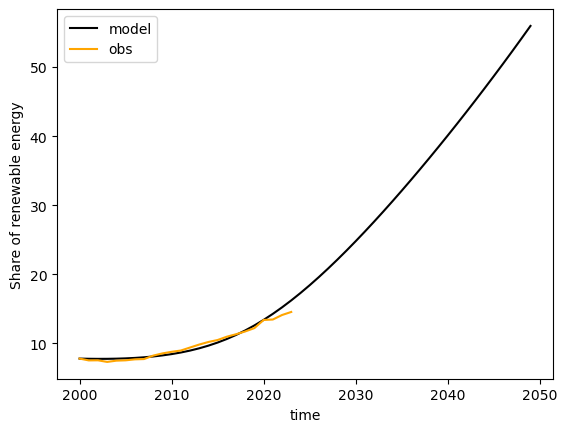

In [40]:
params['beta_0'], params['gamma_g'], params['growth'], params['delta_sig'] = result.x

resu = lef.run_model(inicond = lef.inicond_2000, params = params, n_iter = 100, verbose = False, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2000)
lef.plot_resuvsobs(resu, year_ini = 2000)#, ind_ini = 0, ind_fin = 24)

yini = 2000
print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

In [41]:
params

{'growth': 0.01877564045416566,
 'eps': 1,
 'a': 1,
 'b': 1,
 'gamma_f': 0.5,
 'gamma_g': 0.5751197750514625,
 'eta_g': 0.2,
 'eta_f': 0.2,
 'h_g': 0.5,
 'h_f': 0.5,
 'r_inv': 0.1,
 'beta_0': -0.1149135946421199,
 'delta_sig': 0.3,
 'delta_g': 0.01,
 'delta_f': 0.01,
 'f_heavy': 0.1}

## Notes

delta_sig is a fundamental parameter. When too low (< 0.25) the fit fails and actually there is no transition, the system is stuck on fossil. When too large ( e.g. = 1) there is no transition either.. The best value is between 0.3 and 0.4. This may be linked to the normalization of the Rp variable, which is in the range (-1, 1), and sensible to the bounds for $\beta_0$